# Data Engineering
## NYU Tandon School of Engineering
### Assignment 3 - Nine steps

<a id="back"></a>
### Table of content:
1) [1st step: Connecting to the Database](#conndb)

2) [2nd step: SQL Query](#SQL)

3) [3rd step: Change and save in local drive](#local)

4) [4th step: access, search, and sanity checks](#step4)

5) [5th step: Basic plotting using Seaborn and Matplotlib](#step5) 

6) [6th step: Dealing with Missing values](#step6)

7) [7th step: Scaling and Normalization](#step7)

8) [8th step: Categorical Data Encoding](#step8)

9) [9th step: Dimension Reduction](#step9)



In [268]:
# Importing the needed libraries 
import sqlite3
import pandas as pd
import seaborn as sns


# 1. First step: connecting to a DB
<a id='conndb'></a>

In [269]:
#database location in the local drive
sqlite_file = 'C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/boston.db' 

# connecting to the database file
conn = sqlite3.connect(sqlite_file)

# initialize a cursor obect
cur = conn.cursor()

# define a traversing search
cur.execute("select * from boston limit 100;")

# fetch and print
data = cur.fetchall()
print(data[1])


(1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6)


# 2. Second step: SQL Query 
<a id='SQL'></a>

In [270]:
# SQL Query with condition statements 
cur.execute("select ZN from boston where ZN > 0.0;")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

### *Now, let's first duplicate our original query for the entire table, which was limited to 100 rows.* 

In [271]:

# get all data inside boston table limited to 100 rows
df = pd.read_sql_query("select * from boston limit 100;", conn)
print("df.shape = " + str(df.shape))


df.shape = (100, 15)


### Now, let's grab the whole table and use pandas to sanity check with the head() method and print the summary

In [272]:
# Read entire table from the the database
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
print("\n Sanity check with Pandas head():")
print(df.head())
print("\n Summarize with Pandas describe():")
print(df.describe().transpose())


df.shape = (506, 15)

 Sanity check with Pandas head():
   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

 Summarize with Pandas describe():
         count        mean         std        min         25%        50%  \
record   506.0  252.500000  146.213884    0.00000  126.250000  252.50000   
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    

In [273]:
# get all data inside boston table that has ZN values greater 0
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape for ZN is positive = " + str(df.shape))

# Same as above with additional filtering: records greater than 250
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;", conn)
print("df.shape for ZN is pocsitive and record more than 250 = " + str(df.shape))


df.shape for ZN is positive = (134, 15)
df.shape for ZN is pocsitive and record more than 250 = (66, 15)


In [274]:
# This is an example of multiline search syntax
df = pd.read_sql_query("""
                       select record, ZN, AGE, TAX from boston
                       where ZN > 0.0 and CRIM < 2.5;
                       """,
                       conn)

print("df.shape for multiline search :", df.shape)

df.shape for multiline search : (134, 4)


In [275]:
# use Pandas 'to_sql' method to commit changes to connection
df.to_sql("C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/boston_updated", conn, if_exists="replace")
# close connection
conn.close()

## [Back to Table of content](#back)

# 3. Third step: change and save to local disks
<a id='local'></a>

In [278]:
# Import libraries
from sklearn.datasets import load_iris
# Load Iris dataset
data = load_iris()
# Convert Dataset array to Dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)

In [279]:
# create an index
df.index.name = "record"

# Creating species column 
df['species'] = "new-species"
print(df.head())

print("\n Shape of the DF:",df.shape)

        sepal length (cm)  sepal width (cm)  petal length (cm)  \
record                                                           
0                     5.1               3.5                1.4   
1                     4.9               3.0                1.4   
2                     4.7               3.2                1.3   
3                     4.6               3.1                1.5   
4                     5.0               3.6                1.4   

        petal width (cm)      species  
record                                 
0                    0.2  new-species  
1                    0.2  new-species  
2                    0.2  new-species  
3                    0.2  new-species  
4                    0.2  new-species  

 Shape of the DF: (150, 5)


In [280]:
# save to file
df.to_csv("C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/iris_updated.csv", index=True) 


## [Back to Table of content](#back)

# 4th step: access, search, and sanity checks
<a id ="step4"></a>

In [284]:

#load the data from the included boston.db file, as follows:

sqlite_file = 'C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/boston.db' 
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)

In [285]:
# Select Entire Boston Table
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))

df.set_index("record", inplace=True)
conn.close()

df.shape = (506, 15)


In [288]:
# Some more sanity checks: print first 5 rows with column names
print("Preview of Boston DataFrame: \n",df.head())

# Let's use some more sanity checks to understand more about the data: 
# get amount of rows and columns
print("\n Shape: \n",df.shape)
# get column names in the dataframe
print("\n Columns: \n",df.columns)

Preview of Boston DataFrame: 
            CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  

 Shape: 
 (506, 14)

 Columns: 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MED

### Statistical summary:

In [289]:

# view in transposed form
print(df.describe().transpose())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

### Let's use .min(), .max(), .mean(), and .median() methods as well:

In [290]:
# get max and min values
print("Max :",df.max())
print("Min :",df.min())
print("mean :", df.mean())
print("Median :",df.median())

Max : CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64
Min : CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64
mean : CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64
Median : CRIM         0.25651
ZN           0.00000
IND

### Now, let's get the index of the maximum and minimum values using the .idmax() and .idmin():
### *These methods give index number of the Max or Min value in the column*

In [291]:

# get index of max and min values
print("Index of max:",df.idxmax())
print("\n Index of min:",df.idxmin())



Index of max: CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
MEDV       161
dtype: int64

 Index of min: CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
MEDV       398
dtype: int64


In [294]:
# Additionally, we can get specific rows with ease:
# get first row of data (index=0)
print("row 0: \n",df.loc[0])
# get third row of data (index=2)
print("row 2: \n",df.loc[2])
# print(df.loc[2])
# get first row of CRIM column
print("\n \n Row 0 column CRIM: ",df.loc[0]['CRIM'])

row 0: 
 CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64
row 2: 
 CRIM         0.02729
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           7.18500
AGE         61.10000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          392.83000
LSTAT        4.03000
MEDV        34.70000
Name: 2, dtype: float64

 
 Row 0 column CRIM:  0.00632


In [298]:
# We can also isolate single columns, as follows:
# isolate single columns
df['AGE'].mean()
print("Index of minimum value in Age Column: ",df['AGE'].idxmin())

Index of minimum value in Age Column:  41


### We can even sort DataFrames according to specific columns:

In [299]:
# sort (ascending by default)
df.sort_values(by = 'ZN')
# sort descending
df.sort_values(by = 'ZN', ascending = False)
print("Sorted by descending order of ZN: \n",df.sort_values(by = 'ZN', ascending = False).head())

Sorted by descending order of ZN: 
            CRIM     ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                         
57      0.01432  100.0   1.32   0.0  0.4110  6.816  40.5  8.3248  5.0  256.0   
204     0.02009   95.0   2.68   0.0  0.4161  8.034  31.9  5.1180  4.0  224.0   
203     0.03510   95.0   2.68   0.0  0.4161  7.853  33.2  5.1180  4.0  224.0   
200     0.01778   95.0   1.47   0.0  0.4030  7.135  13.9  7.6534  3.0  402.0   
199     0.03150   95.0   1.47   0.0  0.4030  6.975  15.3  7.6534  3.0  402.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
57         15.1  392.90   3.95  31.6  
204        14.7  390.55   2.88  50.0  
203        14.7  392.78   3.81  48.5  
200        17.0  384.30   4.45  32.9  
199        17.0  396.90   4.56  34.9  


### Now, let's do a permanent sort on the table with the inplace argument, permanently changing how it's stored in memory:
*Caution : Once permanent sort is done it cant be undone if index column wasnt created*

In [303]:

# permanently sort the table
df.sort_values(by = 'ZN', inplace=True)
# now call df.head() on permanently sorted table
print("Sorting orignal df permanently: \n",df.head())

Sorting orignal df permanently: 
             CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
record                                                                         
505      0.04741  0.0  11.93   0.0  0.573  6.030   80.8  2.5050   1.0  273.0   
439      9.39063  0.0  18.10   0.0  0.740  5.627   93.9  1.8172  24.0  666.0   
440     22.05110  0.0  18.10   0.0  0.740  5.818   92.4  1.8662  24.0  666.0   
441      9.72418  0.0  18.10   0.0  0.740  6.406   97.2  2.0651  24.0  666.0   
442      5.66637  0.0  18.10   0.0  0.740  6.219  100.0  2.0048  24.0  666.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
505        21.0  396.90   7.88  11.9  
439        20.2  396.90  22.88  12.8  
440        20.2  391.45  22.11  10.5  
441        20.2  385.96  19.52  17.1  
442        20.2  395.69  16.59  18.4  


### In case we change our minds and want to undo the permanent sort, we can sort according to the original index column and get our original data back:

In [304]:
# sort back on index
df.sort_values(by = 'record', inplace=True)
print("Sorting orignal df permanently: \n",df.head())

Sorting orignal df permanently: 
            CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  


### *As a final example, let's chain together a couple of filters and use the .describe() method for some summary statistics of the smaller,* 
## Filtered dataset: 

In [305]:
# filter dataframe to show only even records
df[df.index % 2 == 0]
# filter dataframe to show only record with AGE greater than 95
df[df['AGE'] > 95]
# get statistical summary of the filtered table
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


## [Back to Table of content](#back)

# 5th step: Basic plotting using Seaborn and Matplotlib
<a id ="step5" ></a>


In [306]:
# Importing libraries for plotting graph:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [334]:
# load iris
data = load_iris()
# Load Features as X
X = data.data
# Load Target 
y = data.target
# Feature column names
cols = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']
# creating DataFrame from Data features
df = pd.DataFrame(X, columns= cols)
# Adding target column 
df['species'] = y

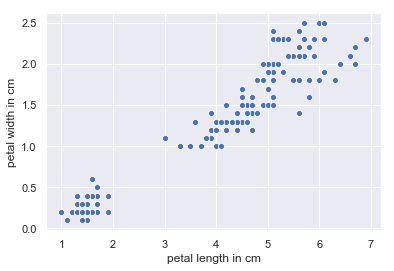

In [322]:
# scatter plot
sns.scatterplot(x='petal length in cm', y='petal width in cm', data=df)

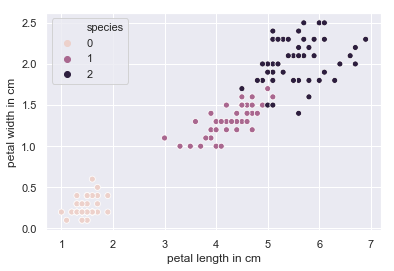

In [323]:
# next, label the data points by color and add the legend with the hue argument:
sns.scatterplot(x='petal length in cm', y='petal width in cm', 
                hue='species', data=df) 

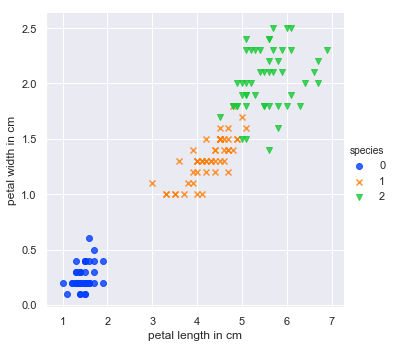

In [324]:
# next, scatter plot points using lmplot with fit_reg=False and markers:
sns.lmplot(x='petal length in cm', y='petal width in cm', 
           hue="species", data=df, fit_reg=False,
           palette='bright',markers=['o','x','v'])

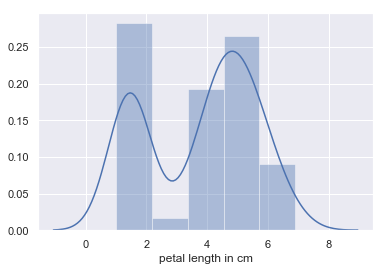

In [325]:
# Histograms with bell curve
sns.distplot(df['petal length in cm'])


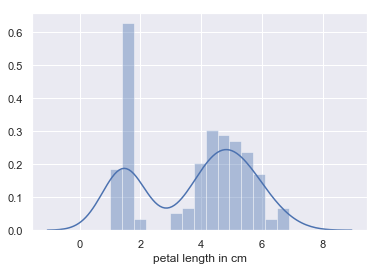

In [326]:
# histogram with 15 bins
sns.distplot(df['petal length in cm'], bins=15)

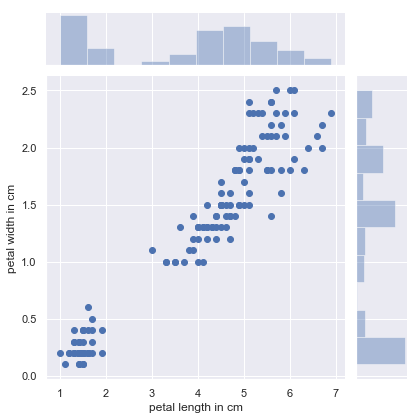

In [327]:
# Jointplots
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='scatter', marginal_kws=dict(bins=10))


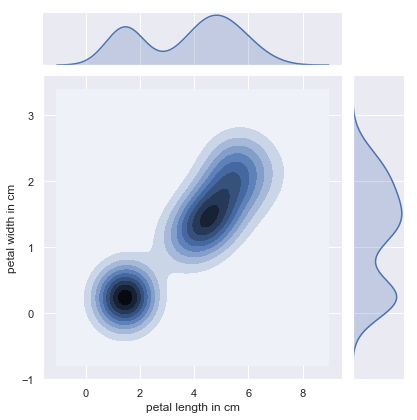

In [328]:
# jointplot with kde
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='kde')

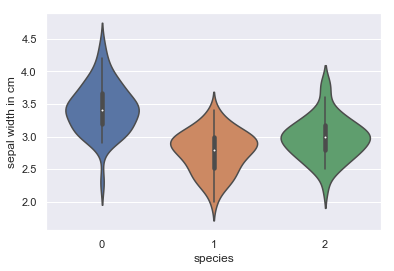

In [329]:
# Violin plots
# y='sepal width in cm'
sns.violinplot(x='species',y='sepal width in cm', data=df)


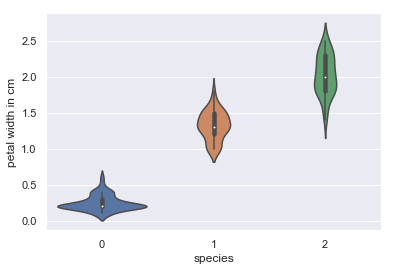

In [330]:
# y='petal width in cm'
sns.violinplot(x='species',y='petal width in cm', data=df)

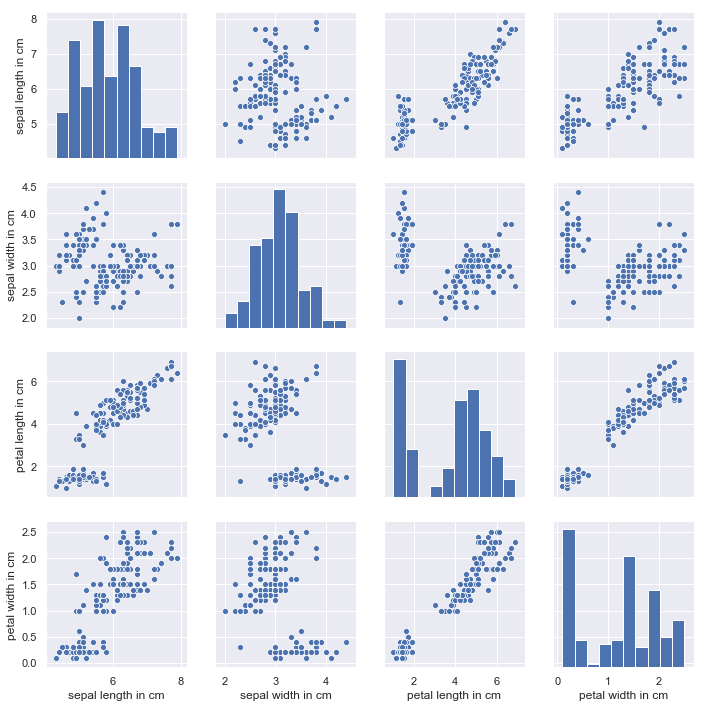

In [339]:
# pairplot with data feature columns
vars_to_plot = cols

sns.pairplot(data=df, vars=vars_to_plot)

[Back to Table of content](#back)

# 6th step: Dealing with Missing values
<a id="step6"></a>

In [340]:
# load iris dataset with missing values with .isnull()
import pandas as pd
df = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/iris_missing_values.csv")
df.index.name = "record"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


In [341]:
# get boolean (True/False) response for each datapoint for NaNs 
df['sepal length in cm'].isnull()

record
0       True
1      False
2       True
3      False
4      False
5       True
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: sepal length in cm, Length: 150, dtype: bool

In [342]:

# check if any missing values in column
print(df['sepal length in cm'].isnull().values.any())

# get number of many missing values in column
print(df['sepal length in cm'].isnull().values.sum())

True
6


In [345]:
# replace missing values with new values (also called imputation method)
df_example = df['sepal length in cm'].fillna('imputation')
print(df_example.head())

record
0    imputation
1           4.9
2    imputation
3           4.6
4             5
Name: sepal length in cm, dtype: object


In [349]:
# drop rows with missing data
print("Before dropping missing data rows or columns: ", df.shape)
df_dropped = df.dropna(axis=0)
print("After dropping missing data rows ",df_dropped.shape)
# we can also drop columns in a similar fashion:
df_dropped = df.dropna(axis=1)
print("After dropping missing data columns ",df_dropped.shape)

Before dropping missing data rows or columns:  (150, 5)
After dropping missing data rows  (144, 5)
After dropping missing data columns  (150, 0)


In [351]:
# import imputer module from Scikit-learn and instantiate imputer object
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [352]:
#define columns to impute on
cols = ['sepal length in cm',
         'sepal width in cm',
         'petal length in cm',
         'petal width in cm',]

In [355]:
# fit imputer and transform dataset, store in df_new
out_imp = imputer.fit_transform(df[cols])
# Creating Dataframe of imputed output data
df_new = pd.DataFrame(data = out_imp, columns = cols)
# adding target column to the dataframe
df_new = pd.concat([df_new, df[['species']]], axis = 1)
print("Imputed DataFrame: ",df_new.shape)

Imputed DataFrame:  (150, 5)


### Above we see complete dataset restored as imputation was done rather than removing

## [Back to Table of content](#back)


# 7th step: Scaling and Normalization
- ### *The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.*
<a id="step7"></a>

In [356]:
#loading the wine data
data = load_wine()
#converrting data arrays to Dataframe

df = pd.DataFrame(data.data, columns=data.feature_names)
# Wine data description
df.index.name = "record"

In [357]:
# define columns to scale 
cols = data.feature_names

### Min-Max normalization: *is one of the most popular scaling processes:*

In [358]:
# load module and instantiate scaler object
from sklearn.preprocessing import MinMaxScaler

# Make object of MinMaxScaler model
scaler = MinMaxScaler()

# Normalize the data and store in out_scaled 
out_scaled = scaler.fit_transform(df[cols])
# Preview of normalized values
print("Normalised Data Values: \n",out_scaled[0:5])

Normalised Data Values: 
 [[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
  0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
  0.56134094]
 [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
  0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
  0.55064194]
 [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
  0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
  0.64693295]
 [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
  0.66455696 0.20754717 0.55835962 0.55631399 0.30894309 0.7985348
  0.85734665]
 [0.58157895 0.36561265 0.80748663 0.53608247 0.52173913 0.62758621
  0.49578059 0.49056604 0.44479495 0.25938567 0.45528455 0.60805861
  0.32596291]]


## Standardization: 
### *is another scaling process: it is used to put the variation within each feature space. Other values can be chosen for advanced standardization, but variance=1 and mean=0 are the most common.*

In [359]:
# load module and instantiate scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# standardize the data and store in out_scaled numpy array
out_scaled_ = scaler.fit_transform(df[cols])
# Preview of scaled values
print("Scaled Data Values: \n",out_scaled_[0:5])

Scaled Data Values: 
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


## [Back to Table of content](#back)


# 8th step: Categorical Data Encoding
<a id="step8"></a>

In [360]:
# load example long jump dataset
df = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/long_jump.csv")
df.set_index('Person', inplace=True)

### Ordinal encoding:
### *Ordinal variables have an order to them. Our examples from the long jump dataset are Jersey Size and Shoe Size.*

In [361]:
# filter in categorical columns ("cats") for demonstration
cats = ['Jersey Size', 'Shoe Size']
print(df[cats])

        Jersey Size  Shoe Size
Person                        
Thomas        small          7
Jane         medium         10
Vaughn        large         12
Vera         medium          9
Vincent       large         12
Lei-Ann       small          7


In [362]:
# import module and instantiate enc object
from sklearn.preprocessing import OrdinalEncoder
# Making object of Model
enc = OrdinalEncoder()

In [363]:
# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
# 
print('identified categories:',enc.categories_)
print('\n Encoded data:\n',out_enc)


identified categories: [array(['large', 'medium', 'small'], dtype=object), array([7, 9, 10, 12], dtype=object)]

 Encoded data:
 [[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


# With the newly-encoded continuous features:

In [364]:

# overwrite categorical features in original dataframe
df[cats] = out_enc
print(df.head())

         Age  Height  Weight  Training Hours/week Jersey Color  Jersey Size  \
Person                                                                        
Thomas    12    57.5    73.4                  6.5         blue          2.0   
Jane      13    65.5    85.3                  8.9        green          1.0   
Vaughn    17    71.9   125.9                  1.1        green          0.0   
Vera      14    65.3   100.5                  7.9          red          1.0   
Vincent   18    70.1   110.7                 10.5         blue          0.0   

         Shoe Size  Long Jump  
Person                         
Thomas         0.0       19.2  
Jane           2.0       25.1  
Vaughn         3.0       14.3  
Vera           1.0       18.3  
Vincent        3.0       21.1  


## One-hot encoding:
### *The one-hot technique emerged from the electronics field as a way to record the state of a machine by using simple binary methods (that is, 0's and 1's).* 
### *Significant shortcoming of one-hot encoding: non-extrapolation of new states not available in the source.*

In [365]:
# import module and instantiate enc object
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

In [366]:
# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
new_cols = enc.get_feature_names(cats).tolist()
print("Column names :",new_cols)

Column names : ['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [367]:
# create temporary dataframe "df_enc" for concatenation with original data
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index


In [368]:
# drop original columns and concat new encoded columns
df.drop(cats, axis=1, inplace=True)
df = pd.concat([df, df_enc], axis = 1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0',
       'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0'],
      dtype='object')


### Label encoding:
### *Often, the only column that needs encoding is the label or output column. For these situations, scikit-learn includes the simple LabelEncoder module that encodes a single column.*

In [369]:

# import modules and instantiate enc object
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [370]:
# fit with integer labels and transform
out_enc = enc.fit_transform([1, 2, 5, 2, 4, 2, 5])
print(out_enc)

[0 1 3 1 2 1 3]


In [371]:
# fit with string labels and transform
out_enc = enc.fit_transform(["blue", "red", "blue", "green", "red", "red"])
print(out_enc)

[0 2 0 1 2 2]


## [Back to Table of content](#back)

# 9th step: Dimension Reduction
<a id="step9"></a>

###  Due to the curse of dimensionality, a reduction of the number of  feature columns might be required before you can get any work done. 
### - There are two main strategies for reducing dimensions, as follows:
1) Selection: Choose the best features and eliminate the others.
2) Transformation: Create new features that summarize the combinations of the original ones.

1) Selection: (1) feature filtering; or (2) wrapper methods. 
2) feature filtering: (i) variance threshold; or (ii) correlation coefficient.

##  The variance threshold
 > 1 - Prefit with no threshold.
 2 - Analyze the variances.
 3 - Choose the threshold.
 4 - Refit with the chosen threshold.

In [372]:
# Lets import wine dataset from sklearn
from sklearn.datasets import load_wine


In [373]:
#loading the wine data
data = load_wine()
# Wine data description
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [374]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [375]:
x = data.data
Y = data.target
# Wine feature dataframe
df = pd.DataFrame(x, columns=data.feature_names)
# joining target column to feature dataframe
df['Wine class'] = Y
print("Wine target class names:", data.target_names)
print("\n Wine features :", data.feature_names)

Wine target class names: ['class_0' 'class_1' 'class_2']

 Wine features : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [376]:
#Summary of dataframe
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [377]:
# instantiate Scikit-learn object with no threshold
from sklearn.feature_selection import VarianceThreshold
# Make object of model
selector = VarianceThreshold()


In [378]:
# Feature column names
cols = data.feature_names

In [379]:
# prefit object with df[cols]
selector.fit(df[cols])

VarianceThreshold(threshold=0.0)

In [380]:
# check feature variances before selection
print(selector.variances_)

[6.55359730e-01 1.24100408e+00 7.48418003e-02 1.10900306e+01
 2.02843328e+02 3.89489032e-01 9.92113512e-01 1.54016191e-02
 3.25754248e-01 5.34425585e+00 5.19514497e-02 5.01254463e-01
 9.86096010e+04]


- ###  For demonstration purposes, we will choose 0.6 as the threshold and then refit. 

In [381]:
# set threshold into selector object
selector.set_params(threshold=0.6)

VarianceThreshold(threshold=0.6)

In [382]:
# refit and transform, store output in out_sel
out_sel = selector.fit_transform(df[cols])
# check which features were chosen
print(selector.get_support())

[ True  True False  True  True False  True False False  True False False
  True]


In [383]:
# filter in the selected features
df_sel = df.iloc[:, selector.get_support()]
# add labels to new dataframe and sanity check
df_sel = pd.concat([df_sel, df[['Wine class']]], axis = 1)
print(df_sel.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0    14.23        1.71               15.6      127.0        3.06   
1    13.20        1.78               11.2      100.0        2.76   
2    13.16        2.36               18.6      101.0        3.24   
3    14.37        1.95               16.8      113.0        3.49   
4    13.24        2.59               21.0      118.0        2.69   

   color_intensity  proline  Wine class  
0             5.64   1065.0           0  
1             4.38   1050.0           0  
2             5.68   1185.0           0  
3             7.80   1480.0           0  
4             4.32    735.0           0  


In [384]:
print("Dataframe shape after selection :",df_sel.shape)
print("Dataframe shape Before selection :", df.shape)

Dataframe shape after selection : (178, 8)
Dataframe shape Before selection : (178, 14)


## The correlation coefficient:
> Lets use the Wine dataset with this method as well

In [385]:
# import matplotlib for access to color maps
import matplotlib.pyplot as plt


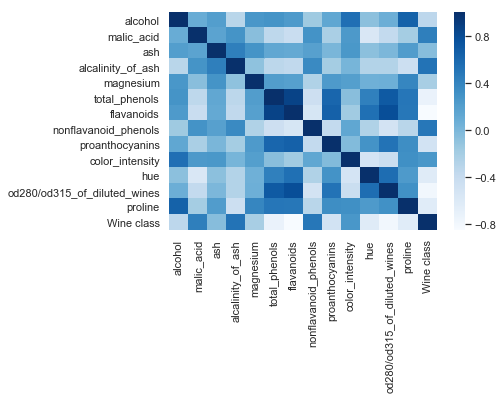

In [386]:
# find correlation with pandas ".corr()"
cor = df.corr()
# visualize with Seaborn heat map, color map = Blues
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()


In [387]:
# get correlation values with target variable
cor_target = abs(cor['Wine class'])
print(cor_target)


alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
Wine class                      1.000000
Name: Wine class, dtype: float64


> ### For demonstration purposes, we will choose 0.6 as the threshold and then filter.

In [388]:
#Select columns with correlation above 0.6
selected_cols = cor_target[cor_target>0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)
# filter in the selected features
df_sel = df[selected_cols.index]
print(df_sel.head())
print("\nDataframe shape after selection :",df_sel.shape)
print("\nDataframe shape Before selection :", df.shape)

selected columns, correlation with target > 0.6
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
Wine class                      1.000000
Name: Wine class, dtype: float64
   total_phenols  flavanoids   hue  od280/od315_of_diluted_wines  proline  \
0           2.80        3.06  1.04                          3.92   1065.0   
1           2.65        2.76  1.05                          3.40   1050.0   
2           2.80        3.24  1.03                          3.17   1185.0   
3           3.85        3.49  0.86                          3.45   1480.0   
4           2.80        2.69  1.04                          2.93    735.0   

   Wine class  
0           0  
1           0  
2           0  
3           0  
4           0  

Dataframe shape after selection : (178, 6)

Dataframe shape Before selection : (178, 14)


## (2) wrapper methods: 
### *If we are willing to use the prediction algorithm's automatic scoring (sequential feature selection), scikit-learn has a built-in method called recursive feature elimination (RFE).*

- We will again use the wine dataset for the consistency

In [389]:
#loading the wine data
data = load_wine()
# Wine data description
#print(data.DESCR)
X = data.data
y = data.target

### *We will use the support vector machine classifier (SVC) as the estimator for our example RFE. Now, let's import our modules and define the independent (X) and dependent (y) variables for the SVC object:*

In [390]:
# load modules for RFE and the classifier SVC
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

### *Next, we will instantiate both the RFE and SVC object, and pass the SVC object as an argument into RFE. We will use the n_features_to_select arg to choose the number of output features (2, in this case). Then, we fit and check the feature rankings with RFE's ranking_ attribute, as follows:*

In [391]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)

RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
  n_features_to_select=2, step=1, verbose=0)

In [392]:
# print rankings of the columns
print(cols)
print(rfe.ranking_)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[ 1  7  3  8 11  6  1  4  9  5 10  2 12]


## Transformation: 
### *This strategy chooses a few new dimensions, or feature vectors, to project the original data into. There are two common mathematical methods, both of which are fully deterministic and targeted at either the supervised or unsupervised case.*

> We will continue to use wine dataset for easy understanding 

In [393]:
# instantiate pca object with 2 output dimensions
from sklearn.decomposition import PCA

In [394]:
#loading the wine data
data = load_wine()
# Assigning Features and target to a variable
X = data.data
y = data.target

In [395]:
# COnverting features to Dataframe
df = pd.DataFrame(X, columns = data.feature_names)
# Adding target to the Feature Dataframe 
df["Wine Class"] = y

In [396]:
cols = data.feature_names
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [397]:
# Making object of pca model with n_component of 2
pca = PCA(n_components=2)
# fit and transform using 13 input dimensions
out_pca = pca.fit_transform(df[cols])

In [398]:
print("Feature shape after PCA reduction:",out_pca.shape)
print("Feature shape Before PCA reduction:",X.shape)

Feature shape after PCA reduction: (178, 2)
Feature shape Before PCA reduction: (178, 13)


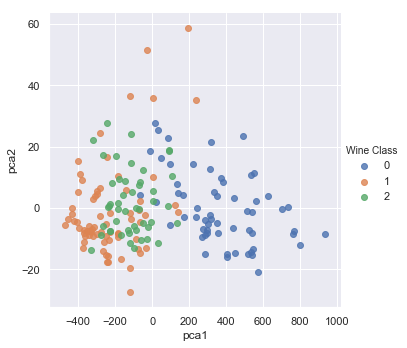

In [399]:
# create pca output dataframe and add label column "Wine Class" 
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
# Combining Target with the PCA output features
df_pca = pd.concat([df_pca, df[['Wine Class']]], axis = 1)
# plot scatter of pca data
sns.lmplot(x='pca1', y='pca2', hue='Wine Class', data=df_pca, fit_reg=False)

## We reduced 13 features to 2 PCA features and below is the explained variance by each PCA columns for those 13 features 

In [400]:
# get variance explained by each component
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


## [Back to Table of content](#back)